# 1. LeNet: 최초의 CNN
```
<img src= 'image/LeNet.png' alt='LeNet'>
```
![설명](image/LeNet.png)
FC(120): 120개 출력층의 뉴런을 가진 Fully Collected Layer

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, AvgPool2D, Flatten, Dense
                                                   # AveragePooling2D 동일
from tensorflow.keras.callbacks import EarlyStopping, Callback
import pandas as pd # crosstab
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [16]:
class CustomHistory(Callback): # on_epoch_end()는 각 epoch 종료시 자동 호출
    def __init__(self, times = 5): # 생성자 함수
        self.epoch = 0
        self.times = times
    def on_epoch_end(self, batch, logs = {}):
        self.epoch += 1
        if self.epoch % self.times == 0:
            print('epoch:{},\n loss:{},\n acc:{},\n val_loss:{},\n val_acc:{}'.\
                  format(self.epoch,
                         logs.get('loss'),
                         logs.get('accuracy'),
                         logs.get('val_loss'),
                         logs.get('val_accuracy'),))

In [17]:
# 출력사이즈 = (입력사이즈 - 커널사이즈)/stride + 1
class LeNet:
    @staticmethod
    def build(input_shape = (32, 32, 1), activation = 'relu'):
        model = Sequential()
        model.add(Input(shape = input_shape))
        model.add(Conv2D(6, # kernel 수
                         kernel_size = (5, 5),
                         activation = activation,
                         kernel_initializer = 'he_normal', # he 초기화(가중치 초기화)
                         padding = 'valid',
                        )) # C1층
        model.add(AvgPool2D(pool_size = (2, 2),
                            strides = 2, # stride size는 기본적으로 pool_size
                            # strides = (2, 2),
                           )) # P2층
        model.add(Conv2D(16,
                         kernel_size = (5, 5),
                         activation = activation,
                         kernel_initializer = 'he_normal',
                        )) # C3층
        model.add(AvgPool2D(pool_size = (2, 2),
                            strides = 2
                           )) # P4층
        model.add(Flatten())
        model.add(Dense(120, 
                        activation = 'relu',
                        kernel_initializer = 'he_normal'
                       )) # F5층
        model.add(Dense(84, 
                        activation = 'relu',
                        kernel_initializer = 'he_normal'
                       )) # F6층
        model.add(Dense(10,
                        activation = 'softmax'
                       )) # 출력층
        return model

In [18]:
class LeNet:
    @staticmethod
    def build(input_shape = (32, 32, 1), activation = 'relu'):
        model = Sequential([
            Input(shape = input_shape),
            Conv2D(6, # output 6
                   kernel_size = (5, 5), # 5 x 5 x 6 + 6 = 156
                   activation = activation,
                   kernel_initializer = 'he_normal',),
            AvgPool2D(pool_size = (2, 2), strides = 2), # 12 - 5 + 1 = 8
            Conv2D(16, 
                   kernel_size = (5, 5), # 16 * 16 * 5 * 6(장)  + 16 = 2,416
                   activation = activation,
                   kernel_initializer = 'he_normal',),
            AvgPool2D(pool_size = (2, 2), strides = 2),
            Flatten(),
            Dense(120, activation = 'relu', # 256 * 120 + 120 
                  kernel_initializer = 'he_normal'),
            Dense(84, activation = 'relu', # 120 * 84 + 84
                  kernel_initializer = 'he_normal'),  # 84 * 10 + 10
            Dense(10, activation = 'softmax') # 출력층
        ])
        return model

In [20]:
model = LeNet.build(input_shape = (28, 28, 1), activation = 'relu')
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_6 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [21]:
# 1. Dataset 
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# 독립변수 scale 조정, float형 변환
X_train = X_train.reshape(-1, 28, 28, 1)/255.0
X_test = X_test.reshape(-1, 28, 28, 1)/255.0
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [22]:
# 2. Model 생성
model = LeNet.build(input_shape = (28, 28, 1))

# 3. Training Process Setting
model.compile(loss = 'sparse_categorical_crossentropy', # One-Hot Encoding 안 하고 분류분석
              optimizer = 'adam',
              metrics = ['accuracy']
             )

# 4. Training
customHistory = CustomHistory(3)
earlystopping = EarlyStopping(patience = 10)
hist = model.fit(X_train, y_train,
                 validation_split = .2,
                 epochs = 50,
                 callbacks = [customHistory, earlystopping],
                 verbose = 0)

epoch:3,
 loss:0.05658550560474396,
 acc:0.9823750257492065,
 val_loss:0.0626210942864418,
 val_acc:0.9819999933242798
epoch:6,
 loss:0.030535414814949036,
 acc:0.9900208115577698,
 val_loss:0.06052177771925926,
 val_acc:0.9823333621025085
epoch:9,
 loss:0.02168995700776577,
 acc:0.9926666617393494,
 val_loss:0.045728929340839386,
 val_acc:0.9887499809265137
epoch:12,
 loss:0.012743296101689339,
 acc:0.9958750009536743,
 val_loss:0.05222925916314125,
 val_acc:0.987583339214325
epoch:15,
 loss:0.01145236101001501,
 acc:0.9961041808128357,
 val_loss:0.0432463064789772,
 val_acc:0.9889166951179504
epoch:18,
 loss:0.008562774397432804,
 acc:0.9972708225250244,
 val_loss:0.05322173982858658,
 val_acc:0.9886666536331177
epoch:21,
 loss:0.006926627364009619,
 acc:0.9976666569709778,
 val_loss:0.062031615525484085,
 val_acc:0.9894166588783264
epoch:24,
 loss:0.005392763763666153,
 acc:0.9983333349227905,
 val_loss:0.07535279542207718,
 val_acc:0.9870833158493042


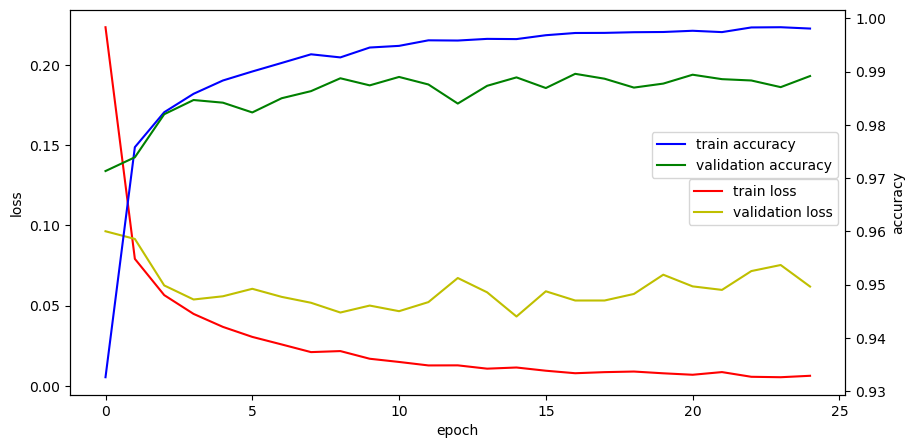

In [24]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize = (10, 5))
loss_ax.plot(hist.history['loss'], 
             'r', 
             label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 
             'y', 
             label = 'validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 
            'b', 
            label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 
            'g', 
            label = 'validation accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'center right')
acc_ax.legend(bbox_to_anchor = (0.999, 0.7))
plt.show()

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)
print("accuracy: {:.2f}%".format(accuracy*100))

313/313 [==============================] - 2s 5ms/step - loss: 0.0448 - accuracy: 0.9904
accuracy: 99.04%


In [35]:
# 예측치와 실제값을 이용한 crosstab
yhat = np.argmax(model.predict(X_test), axis = 1)
display(pd.crosstab(y_test, yhat)) # 결과가 DataFrame
# print(confusion_matrix(y_test, yhat)) # 결과가 Numpy Array
cnt = 0
for y, h in zip(y_test, yhat):
    if y != h:
        cnt += 1
print('예측 실패한 데이터: {}(개)'.format(cnt))

313/313 [==============================] - 1s 3ms/step


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,975,0,0,0,0,0,2,1,2,0
1,0,1127,0,3,0,0,1,3,1,0
2,2,0,1023,0,0,0,0,5,2,0
3,0,1,1,999,0,5,0,2,1,1
4,0,0,1,0,974,0,1,1,0,5
5,1,0,0,5,0,885,1,0,0,0
6,3,1,0,1,2,3,947,0,1,0
7,1,0,6,0,0,0,0,1021,0,0
8,2,0,3,1,0,2,1,0,964,1


예측 실패한 데이터: 96(개)


i = 3763
cnt = 50


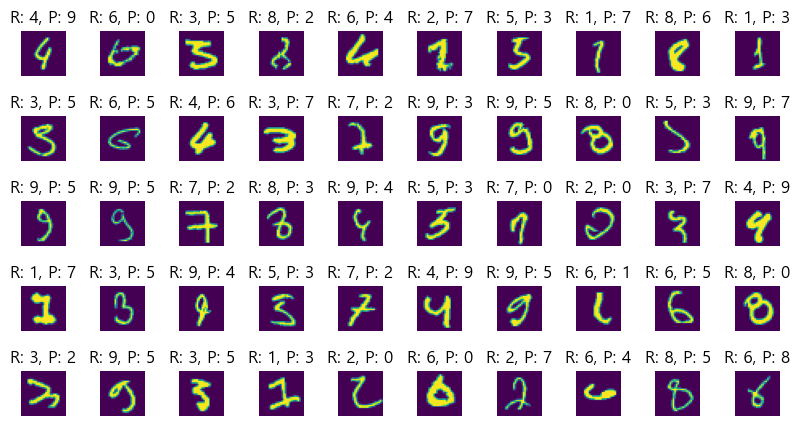

In [37]:
# 실제값(y_test) ≠ 예측값(yhat)
# 모델 학습 후 틀린 데이터 출력용(X_test, y_test)
plt_row = 5
plt_col = 10

plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family = 'Malgun Gothic') # 윈도우즈 os

fig, axarr = plt.subplots(nrows = plt_row,
                          ncols = plt_col,)
# 세로/가로 간격(기본값 0, 커질수록 간격 넓어진다)
plt.subplots_adjust(hspace = .9, 
                    wspace = .3)

i = 0   # yhat과 y_test를 access할 index
cnt = 0 # 예측 실패 횟수
while(cnt < plt_row * plt_col) & (i < len(y_test)):
    # 예측 실패한 경우만 imshow(X_test[i]), 
    # 실제값(y_test)과 예측치(yhat)를 title에 출력
    if yhat[i] == y_test[i]:
        i += 1
        continue
    # 예측 실패한 경우
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(X_test[i].reshape(28, 28))
    title = 'R: {}, P: {}'.format(y_test[i], yhat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i =', i)
print('cnt =', cnt)

# 2. AlexNet
- GPU를 사용하여 실현 가능한 모델. 
- 알렉스와 제프리힌튼이 공동 설계한 CNN 아키텍처 이름
![설명](image/AlexNet.png)
- Convolution, Pooling 한 다음에 BatchNormalization 배치 정규화
- cifar10 라이브러리 이용

In [38]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization # 배치정규화
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [19]:
# 출력사이즈 = (입력사이즈 - 커널사이즈)/stride + 1
class AlexNet:
    @staticmethod
    def build(input_shape = (224, 224, 3), activation = 'relu', class_num = 1000):
        model = Sequential([
            Input(shape = input_shape),
            Conv2D(96, # kernel 수
                   kernel_size = (11, 11), 
                   strides = (4, 4),
                   activation = activation,
                   padding = 'same',),
            MaxPooling2D(pool_size = (3, 3),
                         strides = 2),
            BatchNormalization(), # 배치 정규화
            
            Conv2D(256, 
                   kernel_size = (5, 5),
                   activation = activation,
                   padding = 'same',),
            MaxPooling2D(pool_size = (3, 3),
                         strides = 2),
            BatchNormalization(),
            
            Conv2D(384, 
                   kernel_size = (3, 3),
                   activation = activation,
                   padding = 'same'),
            Conv2D(384, 
                   kernel_size = (3, 3),
                   activation = activation,
                   padding = 'same'),
            Conv2D(256, 
                   kernel_size = (3, 3),
                   activation = activation,
                   padding = 'same'),
            # AlexNet은 224 x 224 이미지에 맞춰서 3 x 3 pooling이 되나,
            # cifar 32 x 32 이미지에서는 생략
            # MaxPooling2D(pool_size = (3, 3),
            #             strides = 2),
            Flatten(),
            Dense(units = 4096, activation = activation),
            Dropout(.5),
            Dense(units = 4096, activation = activation),
            Dropout(.5),
            Dense(units = class_num, activation = 'softmax')
        ])  
        return model

In [20]:
model = AlexNet.build(input_shape = (32, 32, 3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 96)         0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 3, 3, 96)         384       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 256)         614656    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 1, 1, 256)        0         
 2D)                                                             
                                                      

In [24]:
# 1. 데이터 (One-Hot Encoding X)
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

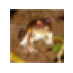

array([6], dtype=uint8)

In [26]:
# airplane(0), automobile(1), bird(2), cat(3), deer(4), dog(5), frog(6), horse(7), ship(8), truck(9)
plt.figure(figsize = (.7, .7))
plt.imshow(X_train[0])
plt.axis('off')
plt.show()
y_train[0]

In [28]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [30]:
# scale 조정 및 float형 변환
X_train = X_train/255.0
X_test  = X_test /255.0
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [36]:
# 2. Model 생성
# model = AlexNet.build(input_shape = (32, 32, 3),
#                      class_num = 10)
# 학습시간 단축을 위해 아래의 Model 사용

model = Sequential([
    Input(shape = (32, 32, 3)), 
    Conv2D(96, # kernel 수
           kernel_size = (11, 11), 
           strides = (4, 4),
           activation = 'relu',
           padding = 'same',), # 11 x 11 x 96 x 3(channel) + 96(output) = 34,944
    MaxPooling2D(pool_size = (3, 3),
                 strides = 2),
    BatchNormalization(), # 배치 정규화

    Conv2D(384, 
           kernel_size = (3, 3),
           activation = 'relu',
           padding = 'same'), # 96(input) x 3 x 3 x 384(output) + 384 = 332,160
    Conv2D(256, 
           kernel_size = (3, 3),
           activation = 'relu',
           padding = 'same'), # 384(input) x 3 x 3 x 256(output) + 256 = 884,992
    
    Flatten(),25
    Dense(units = 1024, activation = 'relu'),
    Dropout(.4),
    Dense(units = 512, activation = 'relu'),
    Dropout(.3),3
    Dense(units = 10, activation = 'softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 3, 96)         0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 3, 3, 96)         384       
 hNormalization)                                                 
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 384)         332160    
                                                                 
 conv2d_21 (Conv2D)          (None, 3, 3, 256)         884992    
                                                                 
 flatten_4 (Flatten)         (None, 2304)             

In [37]:
# 3. Training Process Setting
model.compile(loss = 'sparse_categorical_crossentropy', # One-Hot Encoding 안 했을 경우
              optimizer = 'adam',
              metrics = ['accuracy']
             )
# 4. Training
hist = model.fit(X_train, y_train,
                 epochs = 20,
                 validation_data = [X_test, y_test])

Epoch 1/20
1563/1563 [==============================] - 19s 10ms/step - loss: 1.5879 - accuracy: 0.4148 - val_loss: 1.8416 - val_accuracy: 0.3103
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2648 - accuracy: 0.5515 - val_loss: 1.3957 - val_accuracy: 0.5058
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1009 - accuracy: 0.6129 - val_loss: 1.2150 - val_accuracy: 0.5749
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9742 - accuracy: 0.6575 - val_loss: 1.2378 - val_accuracy: 0.5714
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8604 - accuracy: 0.7006 - val_loss: 1.1450 - val_accuracy: 0.6092
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7637 - accuracy: 0.7329 - val_loss: 1.5208 - val_accuracy: 0.5378
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6622 - accuracy: 0.7678 - val_loss: 1.2102 -

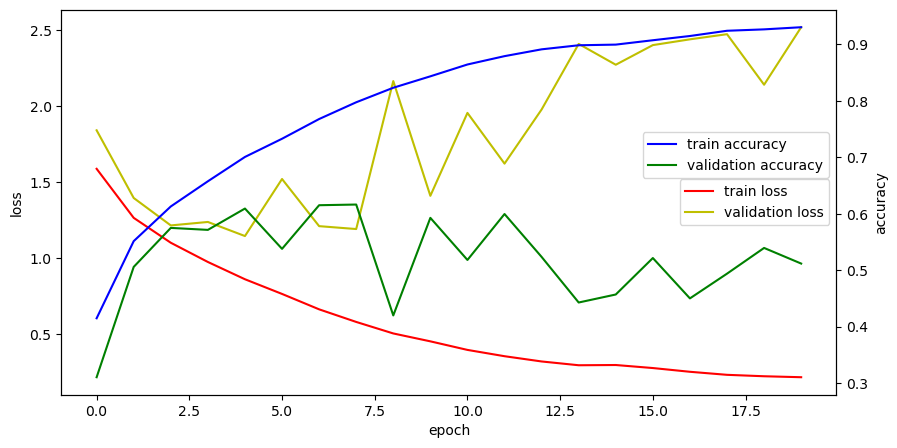

In [39]:
# 5. Model 평가
# 학습과정 살펴보기
fig, loss_ax = plt.subplots(figsize = (10, 5))
loss_ax.plot(hist.history['loss'], 
             'r', 
             label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 
             'y', 
             label = 'validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 
            'b', 
            label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 
            'g', 
            label = 'validation accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'center right')
acc_ax.legend(bbox_to_anchor = (0.999, 0.7))
plt.show()

In [40]:
# evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print('loss:', loss)
print('accuracy:', accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 2.5207 - accuracy: 0.5117
loss: 2.5206568241119385
accuracy: 0.5116999745368958


In [49]:
# crosstab(교차표)
# airplane(0), automobile(1), bird(2), cat(3), deer(4), dog(5), frog(6), horse(7), ship(8), truck(9)
# y_test.reshape(-1) # 실제값을 1차원으로 변경]
y_hat = np.argmax(model.predict(X_test), axis = 1)
y_hat
ctab = pd.crosstab(y_test.reshape(-1), y_hat)
ctab.columns = ['airplane(0)', 'automobile(1)', 'bird(2)', 'cat(3)', 'deer(4)',  
                'dog(5)', 'frog(6)', 'horse(7)', 'ship(8)', 'truck(9)']
ctab.columns.name = 'predict'
ctab.index.name = 'real'
ctab

313/313 [==============================] - 1s 3ms/step


predict,airplane(0),automobile(1),bird(2),cat(3),deer(4),dog(5),frog(6),horse(7),ship(8),truck(9)
real,,,,,,,,,,
0,700,12,21,27,65,19,20,73,36,27
1,62,427,10,40,31,19,36,97,38,240
2,151,9,193,93,181,81,103,166,2,21
3,41,10,22,351,133,183,87,137,8,28
4,44,4,22,68,529,58,85,177,2,11
5,29,3,29,196,87,445,50,148,4,9
6,25,3,23,84,102,40,667,41,3,12
7,21,2,5,59,75,65,12,747,0,14
8,195,32,11,37,102,21,13,74,438,77


array([8], dtype=uint8)

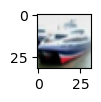

In [55]:
# 6. 모델 사용하기
plt.figure(figsize = (0.7, 0.7))
plt.imshow(X_test[1]*255.0)
y_test[1]

In [61]:
pred = model.predict(X_test[0].reshape(-1, 32, 32, 3)*255).argmax(axis = 1)
pred

1/1 [==============================] - 0s 23ms/step


array([0], dtype=int64)

# 3. VGGNet
- 옥스퍼드 대 VGG팀에서 구현한 CNN(Convolution과 Maxpooling 19개층)
- VGG-19 구현
- imageNet

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
# vgg16: convolution, maxpooling 16개층, accuracy는 vgg19가 더 높음
import pandas as pd
import numpy as np
import cv2 # pip install opencv-python: 이미지 사이즈 조정
import matplotlib.pyplot as plt

In [4]:
class Vgg19:
    @staticmethod
    def build(input_shape = (224, 224, 3), activation = 'relu', class_num = 1000):
        model = Sequential([
            Input(shape = input_shape),
            Conv2D(64, (3, 3), activation = activation, padding = 'same'),
            Conv2D(64, (3, 3), activation = activation, padding = 'same'),
            MaxPooling2D(),
            Conv2D(128, (3, 3), activation = activation, padding = 'same'),
            Conv2D(128, (3, 3), activation = activation, padding = 'same'),
            MaxPooling2D(),
            Conv2D(256, (3,3), activation = activation, padding = 'same'),
            Conv2D(256, (3,3), activation = activation, padding = 'same'),
            Conv2D(256, (3,3), activation = activation, padding = 'same'),
            Conv2D(256, (3,3), activation = activation, padding = 'same'),
            MaxPooling2D(),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            MaxPooling2D(),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            MaxPooling2D(),
            Flatten(),
            Dense(4096, activation = 'relu'),
            Dense(4096, activation = 'relu'),
            Dense(1000, activation = 'softmax')
        ])
        return model

In [5]:
model = Vgg19.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [6]:
vggModel = VGG19() # 학습을 하지 않고 imageNet으로 학습이 끝난 model & weights 내려받아 가중치만 사용
weights = vggModel.get_weights()
model.set_weights(weights = weights) # 학습이 끝난 가중치를 model에 이식
# 추가적인 재학습도 가능함

574710816/574710816 [==============================] - 138s 0us/step


In [15]:
# model.predict(읽어온이미지를 224 x 224 x 3 넘파이배열)
# 예측하기 위해 이미지를 읽어 → 사이즈 조정(openCV라이브러리: pip install opencv-python)
# sol 1) img 데이터를 array로 가져오기
img_cv2 = cv2.imread('data/sample.jpg',
                     cv2.IMREAD_COLOR,     # BGR Format, Alpha(=투명도)채널 무시
                     # cv2.IMREAD_UNCHANGED, # Alpha까지 그대로 읽음
                     # cv2.IMREAD_GRAYSCALE  # 흑백으로 읽음
                    )
img_cv2 = cv2.resize(img_cv2, 
                     dsize = (224, 224),
                     interpolation = cv2.INTER_NEAREST # INTER_NEAREST 보간법을 이용하여 사이즈 조정
                    )
cv2.imshow('sample', img_cv2)
cv2.waitKey(0) # 키보드 입력 대기, 이미지가 화면에 표시된 상태를 유지하기 위함
cv2.destroyAllWindows() # openCV를 통해 생성된 모든 창 닫기
img_cv2.shape

(224, 224, 3)

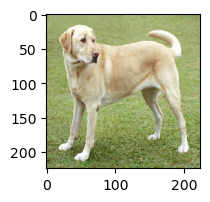

numpy.ndarray

In [20]:
plt.figure(figsize = (2, 2))
# BGR Format인 img_cv2를 RGB Format으로
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(img_cv2_rgb)
plt.show()
type(img_cv2_rgb)

In [31]:
# sol 2) tensorflow의 image 객체 변수 이용 
from tensorflow.keras.preprocessing import image
img = image.load_img('data/sample.jpg', 
                     target_size = (224, 224))
print(type(img))
img_data = image.img_to_array(img)
print('img_data의 Type:', type(img_data), '\nimg_data의 Shape:', img_data.shape)

<class 'PIL.Image.Image'>
img_data의 Type: <class 'numpy.ndarray'> 
img_data의 Shape: (224, 224, 3)


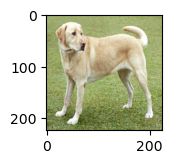

In [34]:
plt.figure(figsize = (1.5, 1.5))
plt.imshow(img)
plt.show()

<class 'numpy.ndarray'> (224, 224, 3)


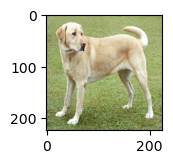

In [43]:
# sol 3) 
img_data1 = plt.imread('data/sample.jpg')
# size 조정 필요
img_data1 = cv2.resize(img_data1,
                       dsize = (224, 224), 
                       interpolation = cv2.INTER_NEAREST)
plt.figure(figsize = (1.5, 1.5))
plt.imshow(img_data1)
print(type(img_data1), img_data1.shape) 

In [42]:
img_data.shape, img_data1.shape

((224, 224, 3), (577, 700, 3))

In [51]:
# 차원 변경 (224, 224, 3) → (1, 224, 224, 3)
# sol 1) newaxis를 이용한 축 추가
a = np.array([1, 2, 3])
print('a 의 shape:\n', a.shape) # tuple
print('a 배열의 축 추가:\n', a[:, np.newaxis])   # 1차원 → 3행 1열(2차원)
print('a 배열의 축 추가:\n', a[np.newaxis, :])   #       → 1행 3열(2차원)
print('a 배열의 축 추가:\n', a[np.newaxis, ...]) #       → 1행 3열(2차원)

a 의 shape:
 (3,)
a 배열의 축 추가:
 [[1]
 [2]
 [3]]
a 배열의 축 추가:
 [[1 2 3]]
a 배열의 축 추가:
 [[1 2 3]]


In [52]:
# sol 2) reshape을 이용한 shape 변경
print('a 배열의 reshape:\n', a.reshape(-1, 3)) #       → 1행 3열(2차원)

a 배열의 reshape:
 [[1 2 3]]


In [69]:
# 예측하기
pred = model.predict(img_data[np.newaxis, ...])
pred.argmax()

1/1 [==============================] - 0s 39ms/step


208

In [70]:
# 예측하기
pred = model.predict(img_data1[np.newaxis, ...])
pred.argmax()

1/1 [==============================] - 0s 38ms/step


208

In [78]:
# decode_predictions 확률 높은 3개
from tensorflow.keras.applications.vgg19 import decode_predictions
result = decode_predictions(pred, top = 5)[0]
print(result)
print()
for row in result:
    print("{}일 확률: {}%".format(row[1], round(row[2]*100, 2)))

[('n02099712', 'Labrador_retriever', 0.7525221), ('n02092339', 'Weimaraner', 0.1301206), ('n02104029', 'kuvasz', 0.02973715), ('n02109047', 'Great_Dane', 0.020166403), ('n02088466', 'bloodhound', 0.015033106)]

Labrador_retriever일 확률: 75.25%
Weimaraner일 확률: 13.01%
kuvasz일 확률: 2.97%
Great_Dane일 확률: 2.02%
bloodhound일 확률: 1.5%


# 4. Inception 모듈
- 교안 p55
    - 1 x 1 Convolution을 하는 이유: feature map 추출이 목적이 아님, Channel 수를 줄여 연산 속도를 줄이기 위함

In [5]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import concatenate

In [7]:
model_input = Input(shape = (28, 28, 3))
pre   = Dense(192)(model_input) # 28 x 28 X 192
# 병렬 연산
conv1 = Conv2D(64, # kernel(filter) 수 
               1,  # kernel size
               padding = 'same')(pre)
conv2 = Conv2D(128, 3, padding = 'same')(pre)
conv3 = Conv2D(32, 5, padding = 'same')(pre)
pool  = MaxPooling2D(pool_size = (3, 3), strides = 1, padding = 'same')(pre) # stride의 기본 size는 pool_size를 따라감
# concat
model_output = concatenate([conv1, conv2, conv3, pool])
# dict 매개변수, 자동완성 불가능
model = Model(inputs = model_input,
              outputs = model_output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 28, 28, 192)  768         ['input_3[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 28, 28, 64)   12352       ['dense_1[0][0]']                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 28, 28, 128)  221312      ['dense_1[0][0]']                
                                                                                              

- GoogleNet 중 Inception 모듈, Bottle Neck 구조
- GoogleNet에서 소개된 핵심 요소로, 이미지 분류와 같은 작업에서 효율적이고 강력한 성능을 제공
```
![image](image/인셉션모듈.png)
```
<img src = "image/인셉션모듈.png" alt = 'image' width = "600">

In [5]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, concatenate

model_input = Input(shape = (28, 28, 3)) # 3 → rgb
pre = Dense(192)(model_input)

# 병렬
conv1   = Conv2D(64, 1, padding = 'same')(pre)

conv2_1 = Conv2D(96, 1, padding = 'same')(pre)
conv2   = Conv2D(128, 3, padding = 'same')(conv2_1)

conv3_1 = Conv2D(16, 1, padding = 'same')(pre)
conv3   = Conv2D(32, 5, padding = 'same')(conv3_1)

pool    = MaxPooling2D(pool_size = (3, 3), strides = 1, padding = 'same')(pre)
conv4   = Conv2D(32, 1, padding = 'same')(pool)

# concat
model_output = concatenate([conv1, conv2, conv3, conv4])
model = Model(inputs  = model_input,
              outputs = model_output)
model.summary()

# 1 x 1 Convolution 결과로 연산 횟수 줄어든다 (params: 388,064 → 164,464)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 28, 28, 192)  768         ['input_3[0][0]']                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 28, 28, 96)   18528       ['dense_1[0][0]']                
                                                                                                  
 conv2d_9 (Conv2D)              (None, 28, 28, 16)   3088        ['dense_1[0][0]']                
                                                                                              

# 5. Residual Block
```
![Residual Block](image/residual_block.png)
```
<img src = 'image/residual_block.png' alt="residual Block" width = "200" style = "float:left;">

In [3]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, add

model_input = Input(shape = (28, 28, 3))
x = Conv2D(64, 3, padding = 'same', activation = 'relu')(model_input)

# residual block
conv = Conv2D(32, 3, padding = 'same', activation = 'relu')(x)
conv = Conv2D(64, 3, padding = 'same', activation = 'relu')(conv)
y = add([conv, x]) # add나 concat하려면 padding = 'same' 필요 
y = Activation('relu')(y)

model_output = Conv2D(64, 3, activation = 'relu')(y)
model = Model(inputs  = model_input, 
              outputs = model_output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 28, 28, 64)   1792        ['input_2[0][0]']                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 28, 28, 32)   18464       ['conv2d_3[0][0]']               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_4[0][0]']               
                                                                                              

# 6. keras에서 Model 가져오기

<img src = 'https://miro.medium.com/v2/resize:fit:720/format:webp/0*tH9evuOFqk8F41FG.png'>

In [5]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions # 예측 결과 디코딩, top 항목 반환
import numpy as np

# weights = 'imagenet'(기본값): imagenet 데이터로 학습이 끝난 가중치(224, 224, 3 image → 1000종 분류)
# weights = None: 랜덤값으로 초기화된 상태의 가중치
# input_shape 지정 가능
model = ResNet50()
# model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [8]:
# Model 간소화, 수정
# imagenet 분류에 해당되지 않는 데이터(녹내장, handwriting) 학습시키기 위함
json_str = model.to_json()
# json_str # 가독성 bad

# write mode로 json 파일 저장
# 빈 브라우저에 파일 드래그하여 open, pretty print 적용 체크
with open('model/model.json', 'w') as json_file:
    json_file.write(json_str)


In [12]:
# json 파일을 model로 가져오기(model 수정 전)
from tensorflow.keras.models import model_from_json 
with open('model/model.json', 'r') as f:
    json_str2 = f.read()
model2 = model_from_json(json_str2)
# model2.summary()

In [74]:
# image를 예측하기 앞서, image 파일을 Numpy Array로 가져오는 방법 4가지
# sol 1)
import cv2
img_cv  = cv2.imread('data/sample.jpg', cv2.IMREAD_COLOR) # resize 필요
img_cv2 = cv2.resize(img_cv, 
                     dsize = (224, 224), 
                     interpolation = cv2.INTER_NEAREST) # 보간법
img_data = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB) # BGR → RGB Format 변경
print('img_cv/img_cv2/img_data의 Shape', img_cv.shape, img_cv2.shape, img_data.shape)
print('img_cv/img_cv2/img_data의 Type', type(img_cv), type(img_cv2), type(img_data))
print()

# sol 2)
# preprocessing = moduel
# keras         = package
# image         = 객체 변수
from tensorflow.keras.preprocessing import image
img = image.load_img('data/sample.jpg', target_size = (224, 224)) # Image 타입
img_data = image.img_to_array(img) # Numpy로 변환

print('img/img_data의 Type', type(img),type(img_data))
print('img_data의 Shape', img_data.shape)
print()

# sol 3)
import matplotlib.pyplot as plt
import cv2
img_plt  = plt.imread('data/sample.jpg', ) # Numpy Array
img_data = cv2.resize(img_plt,
                      dsize = (224, 224),
                      interpolation = cv2.INTER_NEAREST) # 보간법
print('img_plt/img_data의 Type', type(img_plt), type(img_data))
print('img_plt/img_data의 Shape', img_plt.shape, img_data.shape)
print()

# sol 4)
from PIL import Image # pip install pillow
import numpy as np
import cv2
imageFile = Image.open('data/sample.jpg') # 확장자에 따라 Type 바뀜
img_numpy = np.array(imageFile) # Numpy로 변환
img_data = cv2.resize(img_numpy, 
                      dsize = (224, 224), 
                      interpolation = cv2.INTER_NEAREST) # 보간법
print('imageFile/img_numpy/img_data의 Type', type(imageFile), type(img_numpy), type(img_data))
print('img_numpy/img_data의 Shape', img_numpy.shape, img_data.shape)

img_cv/img_cv2/img_data의 Shape (577, 700, 3) (224, 224, 3) (224, 224, 3)
img_cv/img_cv2/img_data의 Type <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>

img/img_data의 Type <class 'PIL.Image.Image'> <class 'numpy.ndarray'>
img_data의 Shape (224, 224, 3)

img_plt/img_data의 Type <class 'numpy.ndarray'> <class 'numpy.ndarray'>
img_plt/img_data의 Shape (577, 700, 3) (224, 224, 3)

imageFile/img_numpy/img_data의 Type <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
img_numpy/img_data의 Shape (577, 700, 3) (224, 224, 3)


In [75]:
# Model 사용
# Model 예측 시 parameter로 들어갈 데이터의 axis 추가

x = np.expand_dims(img_data, axis = 0)
print('Sol 1) np.expand_dims:', x.shape)

x = img_data[np.newaxis, ...]
print('Sol 2) [newaxis, ...]:', x.shape)

x = img_data[np.newaxis, :]
print('Sol 3) [newaxis, :]:', x.shape)

x = img_data.reshape(-1, 224, 224, 3)
print('Sol 4) reshape:', x.shape)

Sol 1) np.expand_dims: (1, 224, 224, 3)
Sol 2) [newaxis, ...]: (1, 224, 224, 3)
Sol 3) [newaxis, :]: (1, 224, 224, 3)
Sol 4) reshape: (1, 224, 224, 3)


In [76]:
pred = model.predict(x)
pred.argmax()

1/1 [==============================] - 0s 32ms/step


208

In [77]:
decode_predictions(pred, top = 3)

[[('n02099712', 'Labrador_retriever', 0.115230285),
  ('n02108089', 'boxer', 0.11239108),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.10665773)]]

# 7. Transfer Learning(전이 학습)

In [1]:
from tensorflow.keras.applications import ResNet50 # version 높을수록 정확도 향상되나 학습 속도 느려짐
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# weights = 'imagenet'(기본값) 그대로 두기
resnet_model = ResNet50(input_shape = (200, 200, 3),
                        include_top = False,) # 모델의 최상위 계층은 포함하지 않고 가져옴. 전이학습 시 사용
# DNN 부분, FC(Full connected) 미포함
resnet_model.trainable = True    # 가중치의 update 허용
# resnet_model.trainable = False # 기존 ResNet50의 가중치는 고정, 새로 추가된 가중치만 update

model = Sequential()
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 1024)              102761472 
                                                                 
 dense_1 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 126,352,259
Trainable params: 126,299,139
Non-trainable params: 53,120
_________________________________________________________________
